In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Start_Up_Data"

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image as image_utils
from skimage.transform import resize
import numpy as np

Our images are also currently in RGB-A when they need to be RGB, so we will also run that conversion.

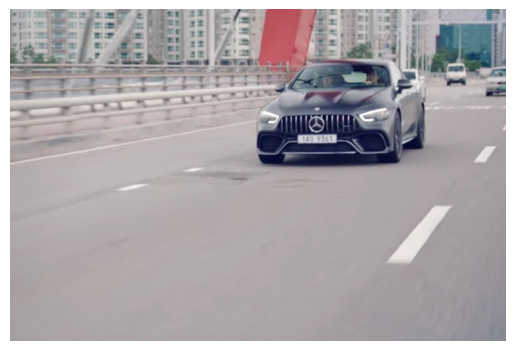

In [ ]:
from PIL import Image

# Function to read and display the image using PIL
def display_image_with_pil(file_path):
    try:
        img = Image.open(file_path)
        img = img.convert('RGB')
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error reading the image: {e}")

file_path = 'startup_example_scene1.png'
display_image_with_pil(file_path)


Before we can classify these three images using our VGG16 model, we need to preprocess them so that they match the dimensions of the image that the model expects, which is 224x224.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
from keras.preprocessing import image as image_utils

# Initialize an empty list to store the processed images
image_list = []

# Loop through the image file paths
for i in range(1, 4):
    file_path = f'startup_example_scene{i}.png'

    try:
        img = Image.open(file_path).convert('RGB')
        img_array = image_utils.img_to_array(img)
        resized_img = resize(img_array, (224, 224), preserve_range=True).astype(np.uint8)
        image_list.append(resized_img)

    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Convert the list of images to a NumPy array
X = np.array(image_list)
print(f"Shape of the array: {X.shape}")


Shape of the array: (3, 224, 224, 3)


In [ ]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import numpy as np
import argparse
import cv2
from keras.applications.vgg16 import preprocess_input

X = preprocess_input(X)
model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
preds = model.predict(X)
P = decode_predictions(preds)


1/1 [==============================] - 3s 3s/step


You can now print out the top 5 predictions for each image below!

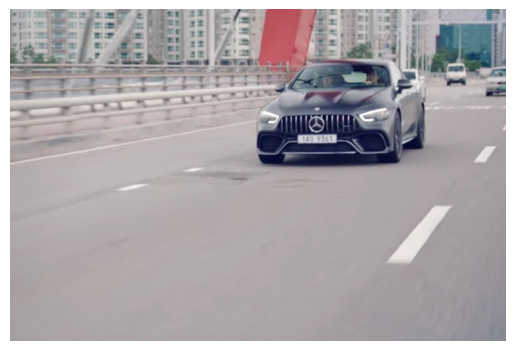

1. racer: 42.23%
2. cab: 15.46%
3. go-kart: 9.00%
4. ambulance: 6.44%
5. police_van: 6.36%


In [ ]:
file_path = 'startup_example_scene' + str(1) + '.png'
display_image_with_pil(file_path)

count = 1
for (ID, label, prob) in P[0]:
    print("{}. {}: {:.2f}%".format(count, label, prob*100))
    count += 1

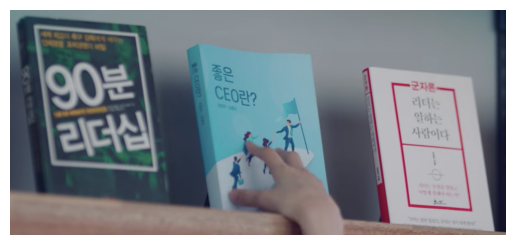

1. binder: 12.65%
2. bookcase: 10.64%
3. modem: 5.84%
4. library: 3.23%
5. rule: 3.20%


In [ ]:
file_path = 'startup_example_scene' + str(2) + '.png'
display_image_with_pil(file_path)

count = 1
for (ID, label, prob) in P[1]:
    print("{}. {}: {:.2f}%".format(count, label, prob*100))
    count += 1

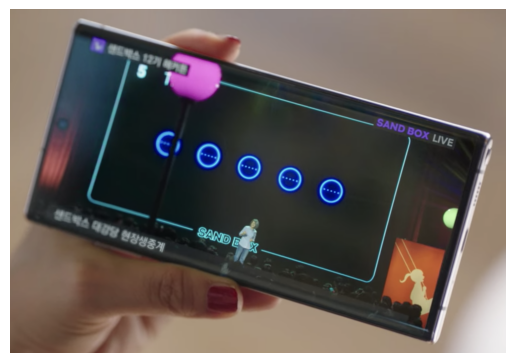

1. digital_clock: 18.92%
2. radio: 7.78%
3. iPod: 7.22%
4. cassette: 5.63%
5. modem: 5.26%


In [ ]:
file_path = 'startup_example_scene' + str(3) + '.png'
display_image_with_pil(file_path)

count = 1
for (ID, label, prob) in P[2]:
    print("{}. {}: {:.2f}%".format(count, label, prob*100))
    count += 1